In [1]:
"""
This is project is predicting (Disney's) stocks prices with three
different regressions linear, ridge, and lasso
"""

"\nThis is project is predicting (Disney's) stocks prices with three\ndifferent regressions linear, ridge, and lasso\n"

In [2]:
#Common Libraries
import math
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
#uploading the data
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("DIS", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,138.500000,136.759995,138.289993,137.259995,5622200.0,137.259995
2019-09-03,136.419998,135.059998,136.369995,136.309998,5997400.0,136.309998
2019-09-04,138.199997,136.389999,136.740005,137.889999,4285400.0,137.889999
2019-09-05,139.270004,138.320007,138.919998,138.839996,5143500.0,138.839996
2019-09-06,139.809998,138.250000,139.130005,139.550003,4089300.0,139.550003


In [5]:
#Data Manipulation
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2017-01-03,102.192978,8884300.0,1.593140,0.740740
2017-01-04,103.503136,8322000.0,1.163440,0.750190
2017-01-05,103.445335,6303000.0,0.772958,0.195950
2017-01-06,104.986710,9551300.0,1.468158,0.888731
2017-01-09,104.389435,6195200.0,0.664453,-0.202617


In [6]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(674, 4)
Dimension of X (667, 4)
Dimension of y (667,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
clreg = clfreg.score(X_test, y_test)
lasso = lasso.score(X_test,y_test)
ridge = ridge.score(X_test,y_test)

print("The linear regression confidence is ",clreg)
print("The lasso regression confidence is ",lasso)
print("The ridge regression 3 confidence is ",ridge)

The linear regression confidence is  0.9394285712274413
The lasso regression confidence is  0.9352363297725488
The ridge regression 3 confidence is  0.9395399242298705


In [15]:
#The Linear regression  is the most accuracy
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set,  forecast_out)

[135.72159345 137.99538334 137.50710108 136.37407817 137.46537039
 138.87996274 139.32336406] 7


In [16]:

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

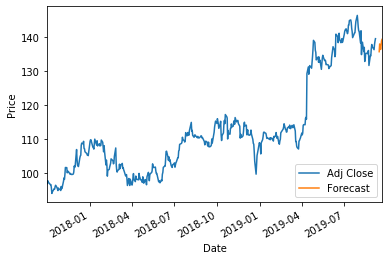

In [17]:

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()